In [33]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA,FastICA

In [34]:
time_range = np.arange(0, 50, 0.001)

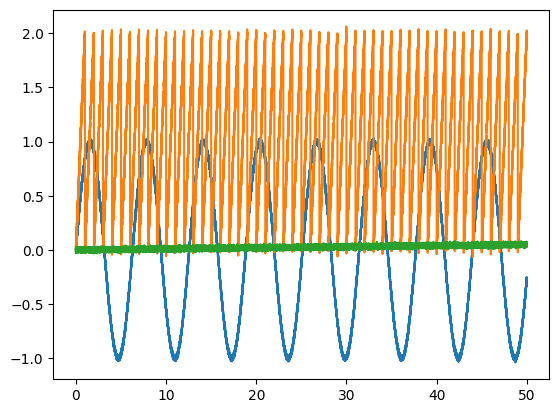

In [35]:
def generate_data(time_range : np.array, noise_multiplier : float = 0.0001) -> np.array:
    
    size = len(time_range)

    f1 = np.sin(time_range) + noise_multiplier * np.random.standard_normal(size = size)
    f2 = 2 * (time_range - np.floor(time_range)) + 2 * noise_multiplier * np.random.standard_normal(size = size)
    f3 = 0.001 * time_range + noise_multiplier * np.random.standard_normal(size = size)
    return np.stack([f1,f2,f3])

data = generate_data(time_range, 0.01)

plt.plot(time_range, data.transpose())
plt.show()

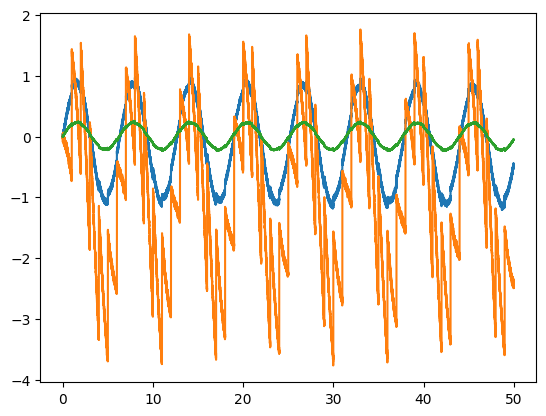

In [36]:
def mix_data(data : np.array) -> np.array:

    a = np.random.standard_normal(size = [3,3])
    return np.matmul(a, data)

mixed_data = mix_data(data)

input_data = mixed_data.transpose()

plt.plot(time_range, mixed_data.transpose())
plt.show()

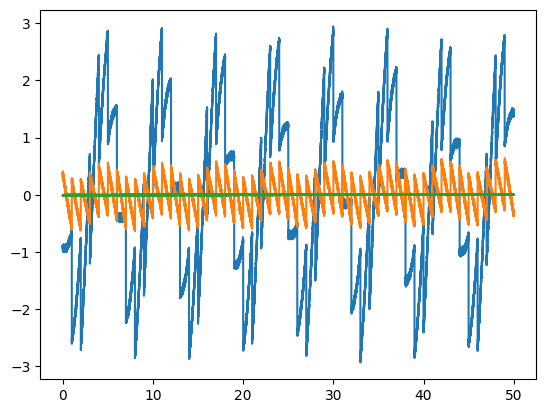

In [37]:
pca = PCA()
pca_result = pca.fit(input_data).transform(input_data)

plt.plot(time_range, pca_result)
plt.show()

c:\Users\Tobias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


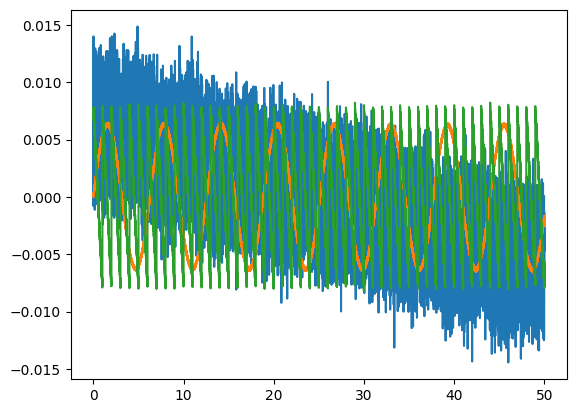

In [38]:
ica = FastICA()
ica_result = ica.fit(input_data).transform(input_data)

plt.plot(time_range, ica_result)
plt.show()

In [1]:
from pyDRMetrics.pyDRMetrics import *

reconstructed_input = pca.inverse_transform(pca_result)

drm = DRMetrics(input_data, pca_result, reconstructed_input)
drm.report()

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q = coranking.coranking_matrix(input_data, pca_result)

trust_isomap = trustworthiness(Q, min_k=1, max_k=50)
cont_isomap = continuity(Q, min_k=1, max_k=50)
lcmc_isomap = LCMC(Q, min_k=1, max_k=50)